In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# https://drive.google.com/file/d/1wh2VybAW2rJLfeM6Yq9zpVi5VsBYcZZs/view?usp=sharing
! gdown 1wh2VybAW2rJLfeM6Yq9zpVi5VsBYcZZs

Downloading...
From: https://drive.google.com/uc?id=1wh2VybAW2rJLfeM6Yq9zpVi5VsBYcZZs
To: /content/N.csv
100% 8.35M/8.35M [00:00<00:00, 83.6MB/s]


In [ ]:
df = pd.read_csv('/content/N.csv')
df

,n1,f1,f2,f3
0,0.053197,0.088662,0.099718,0.058621
1,-0.004590,-0.056952,-0.071764,-0.058621
2,-0.046521,-0.049859,-0.051111,-0.015646
3,0.045895,0.092208,0.091791,0.060498
4,0.024408,-0.000209,0.017524,0.026286
...,...,...,...,...
152437,-0.265581,-0.019492,0.206699,-0.124263
152438,-0.471874,-0.143755,0.296850,-0.004873
152439,-0.221318,0.115735,0.363855,0.252993
152440,0.023553,0.028426,0.175836,0.110050


In [ ]:
X1_notpreproc= df[['n1']].values
X2_notpreproc= df[['f1']].values
X3_notpreproc= df[['f2']].values
X4_notpreproc= df[['f3']].values

X1_notpreproc.shape,X2_notpreproc.shape,X3_notpreproc.shape,X4_notpreproc.shape

((152442, 1), (152442, 1), (152442, 1), (152442, 1))

#Q2_1

choose label for datas

In [ ]:
X1_preproc = X1_notpreproc[0:20000,0]

X2_preproc = X2_notpreproc[0:20000,0]

X3_preproc = X3_notpreproc[0:20000,0]

X4_preproc = X4_notpreproc[0:20000,0]

X1_notlabeled = X1_preproc.reshape(100,200)
X2_notlabeled = X2_preproc.reshape(100,200)
X3_notlabeled = X3_preproc.reshape(100,200)
X4_notlabeled = X4_preproc.reshape(100,200)

label1 = np.ones((100,1))
label2 = np.zeros((100,1))

X1_notlabeled.shape , X2_notlabeled.shape,X3_notlabeled.shape , X4_notlabeled.shape

X1_labeled = np.column_stack((X1_notlabeled,label1))
X2_labeled = np.column_stack((X2_notlabeled,label2))
X3_labeled = np.column_stack((X3_notlabeled,label2))
X4_labeled = np.column_stack((X4_notlabeled,label2))

X_labeled = np.vstack((X1_labeled,X2_labeled,X3_labeled,X4_labeled))

X_labeled.shape


(400, 201)

In [ ]:
# Mean
xf1 = np.zeros((400,1))
for i in range(400):
  xf1[i,0] = np.mean(X_labeled[i,0:198])

In [ ]:
# Abs Mean
xf2 = np.zeros((400,1))
for i in range(400):
  xf2[i,0]=np.mean(np.abs(X_labeled[i,0:198]))

In [ ]:
#Peak
xf3 = np.zeros((400,1))
for i in range(400):
  xf3[i,0] = np.max(X_labeled[i,0:198])

In [ ]:
#Peak to Peak
xf4 = np.zeros((400,1))
for i in range(400):
  xf4[i,0] = np.max(X_labeled[i,0:198]) - np.min(X_labeled[i,0:198])

In [ ]:
# smr
xf5 = np.zeros((400,1))
for i in range(400):
  xf5[i,0] = np.mean(np.sqrt(np.abs(X_labeled[i,0:198])))**2

In [ ]:
# CLF
xf6 = np.zeros((400,1))
for i in range(400):
  xf6[i,0] = (np.max(X_labeled[i,0:198])/(np.mean(np.sqrt(np.abs(X_labeled[i,0:198])))**2))

In [ ]:
#IF1
xf7 = np.zeros((400,1))
for i in range(400):
  xf7[i,0] = (np.max(X_labeled[i,0:198])/(np.mean(np.abs(X_labeled[i,0:198]))))

In [ ]:
#IF2
xf8 = np.zeros((400,1))
for i in range(400):
  xf8[i,0] = np.max(X_labeled[i,0:198])/(np.mean(np.abs(X_labeled[i,0:198])))

In [ ]:
xf_notlabeled = np.hstack((xf1,xf2,xf3,xf4,xf5,xf6,xf7,xf8))


label1 = np.ones((100,1))
label2 = np.zeros((300,1))
xf_labeled1 = np.column_stack((xf_notlabeled[0:100,0:8],label1))
xf_labeled2 = np.column_stack((xf_notlabeled[100:400,0:8],label2))


In [ ]:
X_total = np.vstack((xf_labeled1,xf_labeled2))
print(X_total.shape)

(400, 9)


In [ ]:
from sklearn.utils import shuffle
X_shuffled = shuffle(X_total)
print(X_shuffled.shape)
X = X_shuffled[0:400,0:8]
Y = X_shuffled[0:400,8]

(400, 9)


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2)
x_train1,x_val,y_train1,y_val = train_test_split(x_train,y_train,test_size = 0.25)
x_train1.shape,x_test.shape,y_train1.shape,y_test.shape,x_val.shape,y_val.shape

((240, 8), (80, 8), (240,), (80,), (80, 8), (80,))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train1)
x_train1_normalized = scaler.transform(x_train1)
x_train1_normalized.shape

(240, 8)

#Q2_2

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686

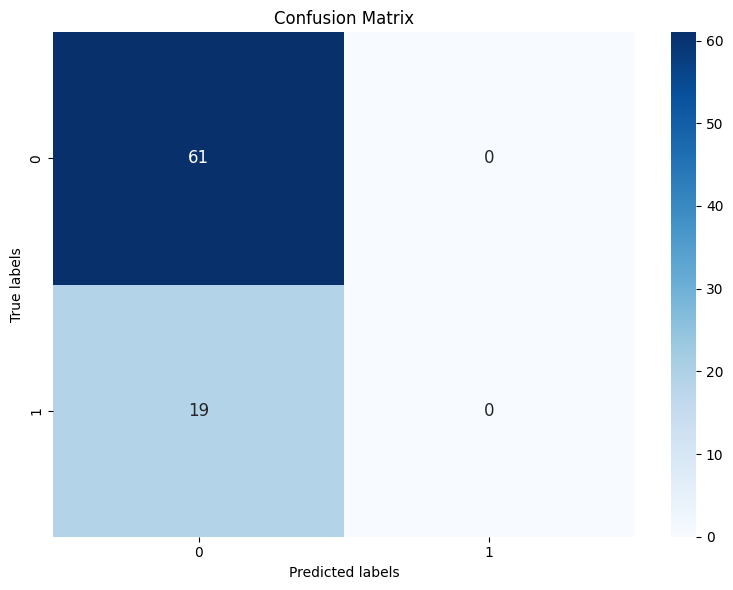

Classification Report:
              precision    recall  f1-score   support

         0.0       0.76      1.00      0.87        61
         1.0       0.00      0.00      0.00        19

    accuracy                           0.76        80
   macro avg       0.38      0.50      0.43        80
weighted avg       0.58      0.76      0.66        80



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

model = MLPClassifier(hidden_layer_sizes=(2,),solver='adam',max_iter=200,activation='identity' )


train_accuracy = []
test_accuracy = []
loss_hist1 = []
loss_hist2 = []

def mse(y, y_hat):
    return np.mean((y - y_hat)**2)

for i in range(1,200):
  model.max_iter = i
  model.fit(x_train1,y_train1)
  train_accuracy.append(model.score(x_train1,y_train1))
  test_accuracy.append(model.score(x_val,y_val))


# Making predictions on the test and validation set
y_pred = model.predict(x_train)
y_pred1 = model.predict(x_test)
y_pred2 = model.predict(x_val)

# Calculating confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred1)

# Plotting confusion matrix as a heatmap with fitted text
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 12})

# Get the axis to modify layout
plt.gca().set_ylim(len(np.unique(y_test)), 0)  # Fix for matplotlib 3.1.1 and 3.1.2
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

# Save the plot as PNG
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300)
plt.show()

# Printing classification report
print("Classification Report:")
print(classification_report(y_test, y_pred1))

def mse(y, y_hat):
    return np.mean((y - y_hat)**2)




(320,)
(320,)


<ipython-input-20-98873ffd4901>:15: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend('train data','validation data')


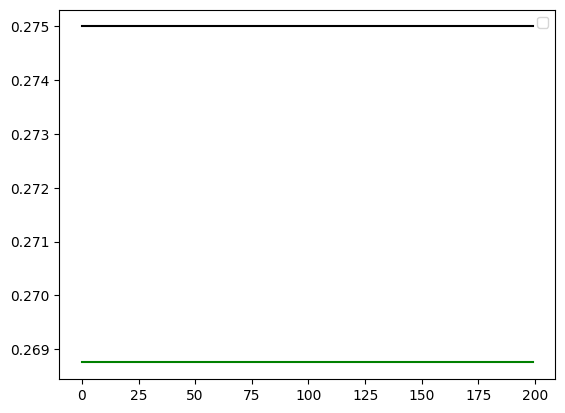

In [ ]:
loss_hist1 = []
loss_hist2 = []
print(y_train.shape)
print(y_pred.shape)
for i in range(200):
  loss1 = mse(y_train,y_pred)
  loss_hist1.append(loss1)

for i in range(200):
  loss2 = mse(y_val,y_pred2)
  loss_hist2.append(loss2)

plt.plot(loss_hist1,color='green')
plt.plot(loss_hist2,color = 'black')
plt.legend('train data','validation data')

Text(0, 0.5, 'accuracy')

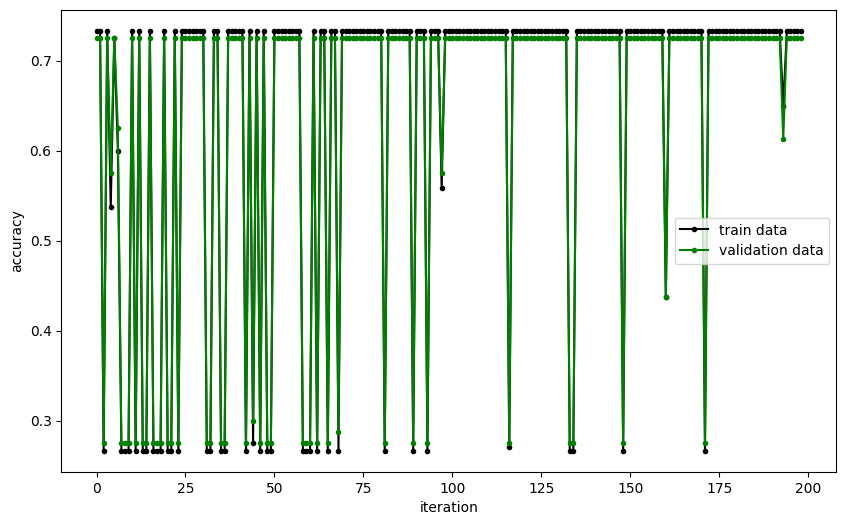

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(train_accuracy, color = 'k', marker = '.')
plt.plot(test_accuracy, color = 'g', marker = '.')
plt.legend(['train data','validation data'])
plt.xlabel('iteration')
plt.ylabel('accuracy')

#Q2_3

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686

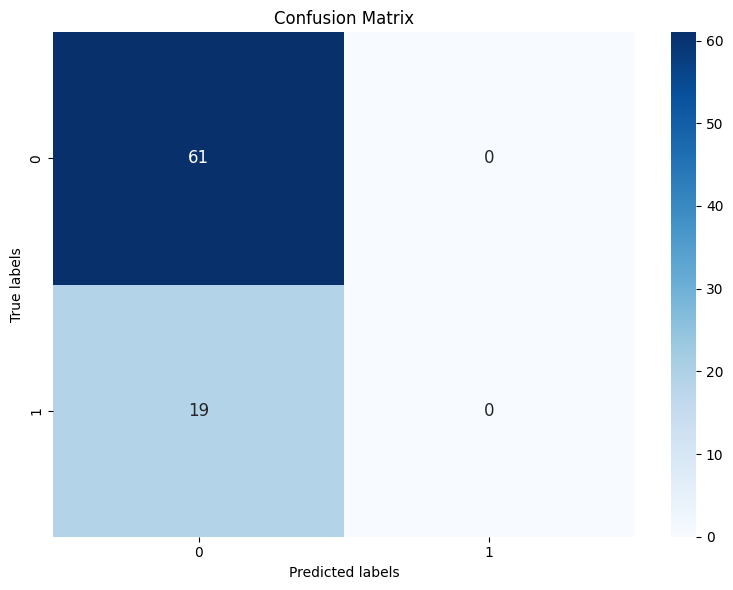

Classification Report:


NameError: name 'y_pred1' is not defined

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

model2 = MLPClassifier(hidden_layer_sizes=(2,),solver='sgd',max_iter=200,activation='identity' )


train_acc = []
test_acc = []


def mse(y, y_hat):
    return np.mean((y - y_hat)**2)

for i in range(1,200):
  model2.max_iter = i
  model2.fit(x_train1,y_train1)
  train_acc.append(model2.score(x_train1,y_train1))
  test_acc.append(model2.score(x_val,y_val))


# Making predictions on the test and validation set
y_p = model2.predict(x_train1)
y_p1 = model2.predict(x_test)
y_p2 = model2.predict(x_val)

# Calculating confusion matrix
cf_matrix = confusion_matrix(y_test, y_p1)

# Plotting confusion matrix as a heatmap with fitted text
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 12})

# Get the axis to modify layout
plt.gca().set_ylim(len(np.unique(y_test)), 0)  # Fix for matplotlib 3.1.1 and 3.1.2
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

# Save the plot as PNG
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300)
plt.show()

# Printing classification report
print("Classification Report:")
print(classification_report(y_test, y_pred1))

def bce(y, y_hat):
    return np.mean(-(y*np.log(y_hat) + (1-y)*np.log(1-y_hat)))

<ipython-input-24-1b96637f3db5>:13: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend('train data','validation data')


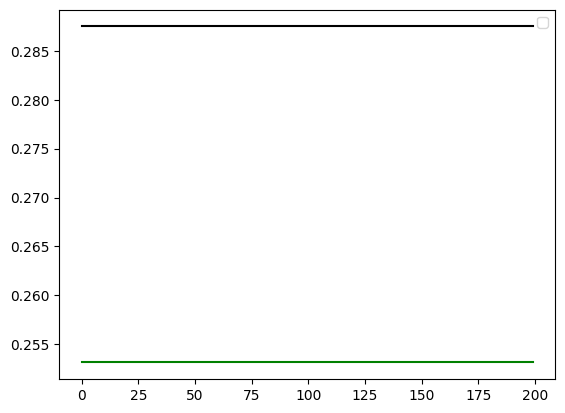

In [ ]:
loss_1 = []
loss_2 = []
for i in range(200):
  loss1 = mse(y_train1,y_pred)
  loss_1.append(loss1)

for i in range(200):
  loss2 = mse(y_val,y_pred2)
  loss_2.append(loss2)

plt.plot(loss_hist1,color='green')
plt.plot(loss_hist2,color = 'black')
plt.legend('train data','validation data')

Text(0, 0.5, 'accuracy')

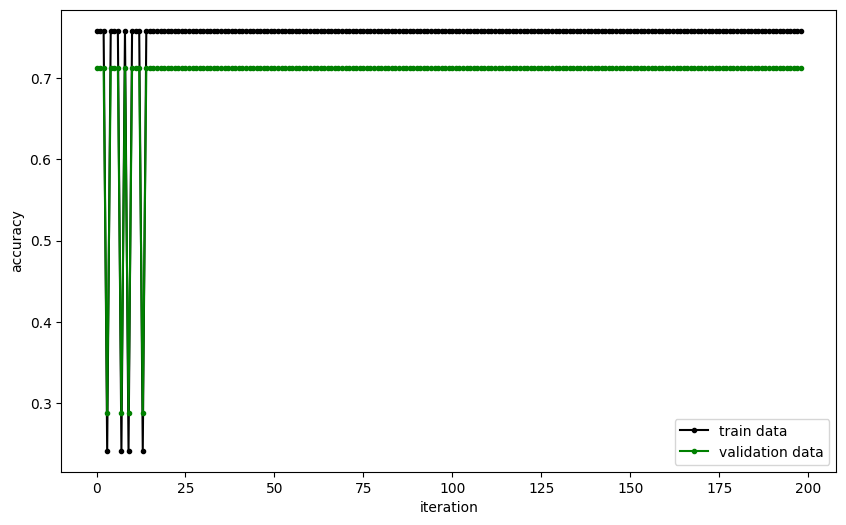

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(train_acc, color = 'k', marker = '.')
plt.plot(test_acc, color = 'g', marker = '.')
plt.legend(['train data','validation data'])
plt.xlabel('iteration')
plt.ylabel('accuracy')

#Q2_4


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
scores = cross_val_score(model, X, Y, cv=kf)
print(scores)
print("mean Scores:", scores.mean())
print("std Scores:", scores.std())

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (199) reached and the optimization hasn't converged yet.
  warnings.warn(


[0.775 0.675 0.775 0.775 0.875 0.85  0.6   0.775 0.675 0.725]
mean Scores: 0.7499999999999999
std Scores: 0.07905694150420949


In [ ]:
import warnings
warnings.filterwarnings("ignore") # Disable all warnings
from sklearn.model_selection import StratifiedGroupKFold
skf = StratifiedGroupKFold(n_splits=10)
scores2 = cross_val_score(model, X, Y, cv=skf)
print(scores2)
print("mean Scores:", scores2.mean())
print("std Scores:", scores2.std())

[nan nan nan nan nan nan  1. nan nan nan]
mean Scores: nan
std Scores: nan
